In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Open the dataset
df = pd.read_csv('Dummy_data.csv')

In [3]:
# Divide into X, y and a presentation part for demo purposes. This can be included in X and y if you don't plan on a demo.
presentation = df.tail(20)
df = df.drop(df.tail(20).index)
X = df.drop(['customerid','churn_Yes','totalcharges'], axis = 1)
y = df[['churn_Yes']]

In [4]:
# Splitting in training and testing set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=19, stratify = y)

In [5]:
# Using GridSearchCv to find optimal parameters for RandomForestClassifier.
rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [6]:
# Getting the parameters

CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [7]:
depth_list = list(range(2,15))
depth_tuning = np.zeros((len(depth_list),4))
depth_tuning[:,0] = depth_list

for index in range(len(depth_list)):
    mytree = RandomForestClassifier(max_depth = depth_list[index])
    mytree.fit(X_train, y_train.values.ravel())
    y_pred = mytree.predict(X_test)
    depth_tuning[index,1]= accuracy_score(y_test, y_pred)
    depth_tuning[index,2]= precision_score(y_test, y_pred)
    depth_tuning[index,3]= recall_score(y_test, y_pred)
col_names = ['Max_depth','Accuracy','Precision','Recall']
pd.DataFrame(depth_tuning, columns = col_names)

,Max_depth,Accuracy,Precision,Recall
0,2.0,0.737067,1.000000,0.010714
1,3.0,0.779307,0.698745,0.298214
2,4.0,0.797817,0.686111,0.441071
3,5.0,0.801139,0.680307,0.475000
4,6.0,0.800664,0.664319,0.505357
5,7.0,0.798766,0.655251,0.512500
6,8.0,0.799241,0.651214,0.526786
7,9.0,0.796393,0.647191,0.514286
8,10.0,0.793545,0.639198,0.512500
9,11.0,0.789748,0.628009,0.512500


In [8]:
# Creating and applying the Random Forest Classifier.

clf = RandomForestClassifier(criterion = 'gini', n_estimators = 200, random_state = 30, max_features='sqrt', max_depth = 8)
clf.fit(X_train, y_train.values.ravel())

RandomForestClassifier(max_depth=8, n_estimators=200, random_state=30)

In [9]:
score = clf.score(X_test, y_test)
print(score)

prediction_test = clf.predict(X_test)

0.7978168011390603


In [10]:
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

cm = confusion_matrix(y_test, prediction_test)

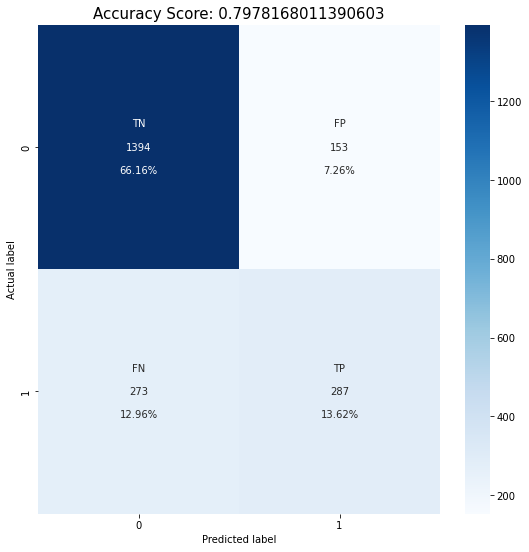

In [11]:
plt.figure(figsize=(9,9))

group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n\n{v2}\n\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [12]:
# Feature importance

feature_importances = pd.DataFrame(clf.feature_importances_, index =X.columns,  columns=['importance']).sort_values('importance', ascending=False)
feature_importances


,importance
tenure,0.209057
contract_Month-to-month,0.160606
monthlycharges,0.126200
internetservice_Fiber optic,0.076976
paymentmethod_Electronic check,0.067861
contract_Two year,0.065868
internetservice_No,0.030619
contract_One year,0.029420
onlinesecurity_Yes,0.028736
techsupport_Yes,0.025664


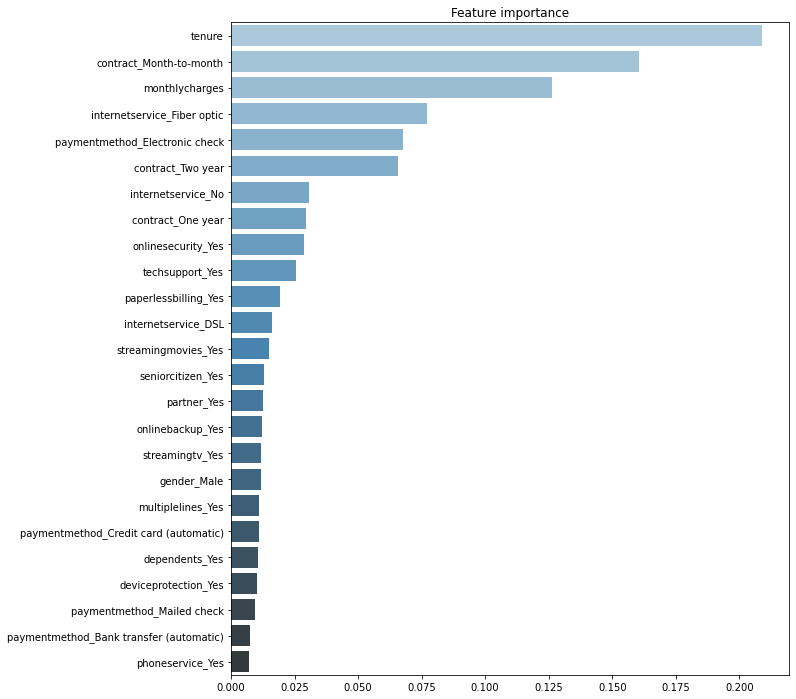

In [13]:
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')

In [14]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print(classification_report(y_test,prediction_test))

0.8370626525630595
0.7978168011390603
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1547
           1       0.65      0.51      0.57       560

    accuracy                           0.80      2107
   macro avg       0.74      0.71      0.72      2107
weighted avg       0.79      0.80      0.79      2107



In [15]:
print(score)

0.7978168011390603


In [16]:
# k-fold cross validation evaluation of xgboost model

from numpy import loadtxt
import xgboost
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


# CV model
model = RandomForestClassifier(criterion = 'gini', n_estimators = 200, random_state = 30, max_features='sqrt', max_depth = 8)
kfold = StratifiedKFold(n_splits=5)
results = cross_val_score(model, X, y.values.ravel(), cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 80.12% (0.75%)


In [17]:
a = (-0.056 * (28*0.0003))*100
a

-0.04704